In [15]:
#import Libraries

import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("cluster_data1.csv")
df.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [17]:
sample = df.copy()
sample = ((sample-sample.min()) / (sample.max() - sample.min())) * 9 + 1
sample

,X1,X2,X3,X4
0,7.00,4.750,7.101695,7.000
1,6.00,4.375,8.016949,7.375
2,4.25,4.750,6.338983,6.250
3,9.25,4.750,9.542373,8.500
4,5.25,6.250,6.338983,6.625
...,...,...,...,...
145,3.75,8.125,1.457627,2.125
146,3.50,7.375,1.762712,1.375
147,5.50,3.250,8.016949,5.875
148,4.50,7.750,2.067797,1.750


In [18]:
data = np.array(sample)
data

array([[ 7.        ,  4.75      ,  7.10169492,  7.        ],
       [ 6.        ,  4.375     ,  8.01694915,  7.375     ],
       [ 4.25      ,  4.75      ,  6.33898305,  6.25      ],
       [ 9.25      ,  4.75      ,  9.54237288,  8.5       ],
       [ 5.25      ,  6.25      ,  6.33898305,  6.625     ],
       [ 6.25      ,  5.5       ,  7.55932203,  9.25      ],
       [ 9.5       ,  4.        ,  9.69491525,  8.125     ],
       [ 2.25      ,  4.75      ,  1.61016949,  1.75      ],
       [ 2.75      ,  4.75      ,  1.91525424,  1.375     ],
       [ 2.75      ,  6.25      ,  1.91525424,  2.125     ],
       [ 4.75      ,  4.        ,  7.25423729,  9.625     ],
       [ 5.25      ,  4.375     ,  6.33898305,  6.25      ],
       [ 2.5       ,  2.5       ,  4.50847458,  4.375     ],
       [ 6.75      ,  4.375     ,  6.49152542,  5.5       ],
       [ 4.75      ,  3.625     ,  5.72881356,  4.375     ],
       [ 3.75      ,  6.25      ,  1.76271186,  2.125     ],
       [ 1.25      ,  4.

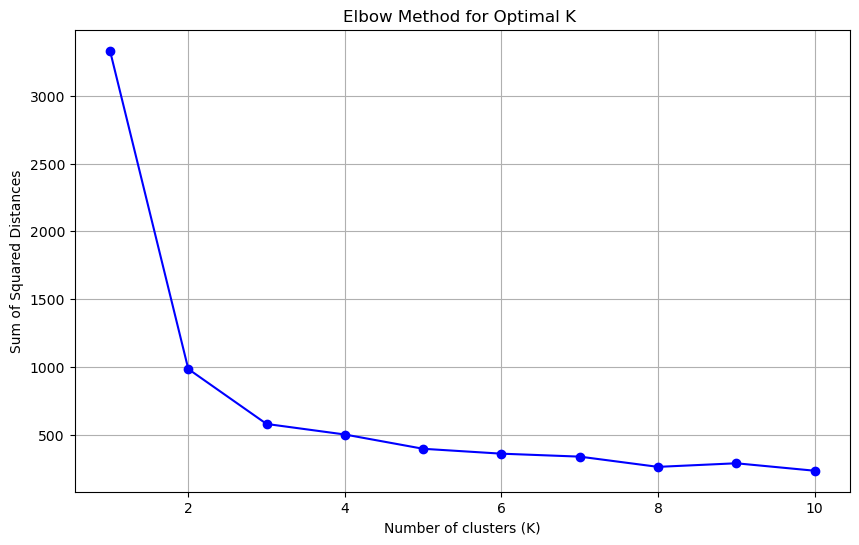

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def random_centroids(data, K):
    # Randomly select K data points as initial centroids
    indices = np.random.choice(len(data), K, replace=False)
    centroids = data[indices]
    return centroids

def assign_cluster(data, centroids):
    # Assign each data point to the closest centroid
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def new_centroids(data, centroids, assignments, K):
    new_centroids = np.zeros_like(centroids)
    for k in range(K):
        cluster_points = data[assignments == k]
        if len(cluster_points) > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

def sse(data, assignments, centroids):
    sse = 0
    for k, centroid in enumerate(centroids):
        cluster_points = data[assignments == k]
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

def kmeans_clustering(data, K, max_iter=100, tol=1e-3):
    it = -1
    all_sse = []
    assignments = []

    # Place K centroids at random locations
    centroids = random_centroids(data, K)

    # Until algorithm converges (needs two iterations before comparing the errors)
    while (len(all_sse) <= 1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it - 1]) / all_sse[it - 1] >= tol)):
        it += 1
        # Assign all data points to the closest center
        assignments = assign_cluster(data, centroids)

        # Compute the new centroids
        centroids = new_centroids(data, centroids, assignments, K)

        # Compute SSE
        sse_kmeans = sse(data, assignments, centroids)
        all_sse.append(sse_kmeans)

    return centroids, assignments, all_sse



# Range of K values to try
k_values = range(1, 11)

# Compute sum of squared distances for each value of K and plot
plt.figure(figsize=(10, 6))
sse_values = []
for k in k_values:
    centroids, assignments, all_sse = kmeans_clustering(data, k)
    sse_values.append(all_sse[-1])  # Appending the SSE of the last iteration

# Sort the K values and SSE values
k_values_sorted = sorted(k_values)
sse_values_sorted = [sse_values[k - 1] for k in k_values_sorted]

# Plot the sorted data with connected lines
plt.plot(k_values_sorted, sse_values_sorted, marker='o', color='blue', linestyle='-')

plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K ')
plt.grid(True)
plt.show()


In [20]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def initialize_centers(X, k):
    n_samples, n_features = X.shape
    centers = np.zeros((k, n_features))
    # Randomly choose the first center
    random_index = np.random.choice(n_samples)
    centers[0] = X[random_index]
    
    # Initialize remaining centers
    for i in range(1, k):
        distances = np.array([min([euclidean_distance(x, center) for center in centers[:i]]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probabilities = probabilities.cumsum()
        rand = np.random.random()
        for j, p in enumerate(cumulative_probabilities):
            if rand < p:
                centers[i] = X[j]
                break
    return centers

def kmeans_pp(X, k, max_iters=100):
    centers = initialize_centers(X, k)
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        # Assign samples to nearest center
        for idx, sample in enumerate(X):
            distances = [euclidean_distance(sample, center) for center in centers]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(idx)
        # Update centers
        new_centers = np.zeros((k, X.shape[1]))
        for i, cluster in enumerate(clusters):
            cluster_mean = np.mean(X[cluster], axis=0)
            new_centers[i] = cluster_mean
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, clusters

# Example usage

X = np.array(df)

# Number of clusters
k = 3

# Run K-means++
centers, clusters = kmeans_pp(X, k)

# Print the centers and clusters
print("Final centers:")
print(centers)
print("\nClusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")


Final centers:
[[5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]

Clusters:
Cluster 1: [7, 8, 9, 15, 16, 18, 19, 23, 25, 27, 28, 31, 32, 33, 38, 40, 41, 42, 44, 46, 47, 56, 58, 59, 64, 66, 68, 69, 70, 72, 74, 80, 86, 90, 91, 103, 110, 112, 114, 120, 125, 126, 130, 131, 137, 138, 145, 146, 148, 149]
Cluster 2: [0, 1, 3, 5, 6, 17, 20, 26, 30, 60, 63, 65, 71, 73, 77, 82, 83, 84, 85, 94, 100, 101, 102, 104, 106, 111, 113, 115, 118, 119, 121, 123, 124, 132, 134, 141, 143, 147]
Cluster 3: [2, 4, 10, 11, 12, 13, 14, 21, 22, 24, 29, 34, 35, 36, 37, 39, 43, 45, 48, 49, 50, 51, 52, 53, 54, 55, 57, 61, 62, 67, 75, 76, 78, 79, 81, 87, 88, 89, 92, 93, 95, 96, 97, 98, 99, 105, 107, 108, 109, 116, 117, 122, 127, 128, 129, 133, 135, 136, 139, 140, 142, 144]


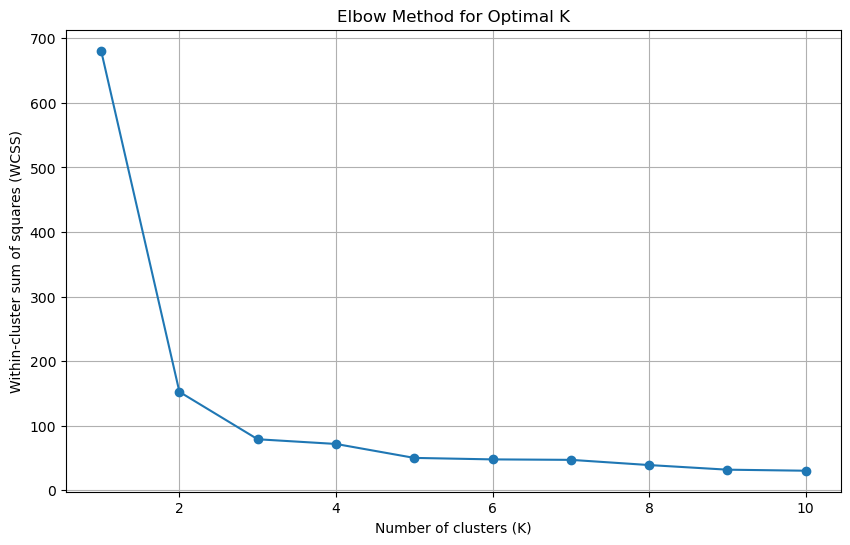

In [21]:
import matplotlib.pyplot as plt

def calculate_wcss(X, centers, clusters):
    wcss = 0
    for i, center in enumerate(centers):
        cluster = X[clusters[i]]
        distances = np.sum((cluster - center) ** 2)
        wcss += distances
    return wcss

# Example usage
wcss_values = []
max_k = 10  # maximum number of clusters to try
for k in range(1, max_k+1):
    centers, clusters = kmeans_pp(X, k)
    wcss = calculate_wcss(X, centers, clusters)
    wcss_values.append(wcss)

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, max_k+1), wcss_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [22]:
df2 = pd.read_csv('cluster_data2.csv')
df2

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05
5,5.83,2.75,4.27,1.34
6,4.86,3.31,1.45,0.22
7,6.63,2.96,5.50,1.93
8,5.01,3.39,1.55,0.27
9,6.45,3.03,5.33,2.17


In [23]:
sample2 = df2.copy()
sample2 = ((sample2-sample2.min()) / (sample2.max() - sample2.min())) * 9 + 1
sample2

,X1,X2,X3,X4
0,2.675532,10.00,1.000000,1.272727
1,2.005319,7.84,1.020690,1.000000
2,5.739362,1.00,6.627586,5.909091
3,4.734043,1.72,6.400000,5.727273
4,9.090426,3.25,9.524138,9.454545
5,5.643617,1.90,6.896552,6.227273
6,1.000000,6.94,1.062069,1.136364
7,9.473404,3.79,9.441379,8.909091
8,1.718085,7.66,1.268966,1.363636
9,8.611702,4.42,9.089655,10.000000


In [29]:
#Without Scaling The Data from 1-10
import numpy as np
from collections import Counter

# Define the dataset
Y = np.array([df2])

# Define the classes corresponding to each data point
classes = ['A', 'A', 'B', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'B', 'C', 'A', 'C', 'B']

# Define K
K = 5

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def knn_predict(X, y, query_point, k=5):
    distances = []
    for i in range(len(Y)):
        distance = euclidean_distance(Y[i], query_point)
        distances.append((distance, y[i]))
    distances = sorted(distances)[:k]
    targets = [distance[1] for distance in distances]
    return Counter(targets).most_common(1)[0][0]

# Assign classes for each data point using K-NN
predicted_classes = []
for i in range(len(Y)):
    predicted_class = knn_predict(Y, classes, Y[i], k=K)
    predicted_classes.append(predicted_class)

# Print the results
for i in range(len(Y)):
    print("Data point:")
    print( Y[i])
    print("Predicted Class:", predicted_classes[i])
    




Data point:
[[5.21 3.65 1.42 0.25]
 [5.07 3.41 1.43 0.19]
 [5.85 2.65 4.14 1.27]
 [5.64 2.73 4.03 1.23]
 [6.55 2.9  5.54 2.05]
 [5.83 2.75 4.27 1.34]
 [4.86 3.31 1.45 0.22]
 [6.63 2.96 5.5  1.93]
 [5.01 3.39 1.55 0.27]
 [6.45 3.03 5.33 2.17]
 [6.1  2.87 4.37 1.38]
 [6.74 3.04 5.62 1.94]
 [4.88 3.33 1.47 0.29]
 [6.57 2.94 5.77 2.04]
 [6.26 2.85 4.49 1.41]]
Predicted Class: A


In [28]:
#With Scaling the data From 1-10
import numpy as np
from collections import Counter

# Define the dataset
Y = np.array([sample2])

# Define the classes corresponding to each data point
classes = ['A', 'A', 'B', 'B', 'C', 'B', 'A', 'C', 'A', 'C', 'B', 'C', 'A', 'C', 'B']

# Define K
K = 5

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def knn_predict(X, y, query_point, k=5):
    distances = []
    for i in range(len(Y)):
        distance = euclidean_distance(Y[i], query_point)
        distances.append((distance, y[i]))
    distances = sorted(distances)[:k]
    targets = [distance[1] for distance in distances]
    return Counter(targets).most_common(1)[0][0]

# Assign classes for each data point using K-NN
predicted_classes = []
for i in range(len(Y)):
    predicted_class = knn_predict(Y, classes, Y[i], k=K)
    predicted_classes.append(predicted_class)

# Print the results
for i in range(len(Y)):
    print("Data point:")
    print( Y[i])
    print("Predicted Class:", predicted_classes[i])
    




Data point:
[[ 2.67553191 10.          1.          1.27272727]
 [ 2.00531915  7.84        1.02068966  1.        ]
 [ 5.7393617   1.          6.62758621  5.90909091]
 [ 4.73404255  1.72        6.4         5.72727273]
 [ 9.09042553  3.25        9.52413793  9.45454545]
 [ 5.64361702  1.9         6.89655172  6.22727273]
 [ 1.          6.94        1.06206897  1.13636364]
 [ 9.47340426  3.79        9.44137931  8.90909091]
 [ 1.71808511  7.66        1.26896552  1.36363636]
 [ 8.61170213  4.42        9.08965517 10.        ]
 [ 6.93617021  2.98        7.10344828  6.40909091]
 [10.          4.51        9.68965517  8.95454545]
 [ 1.09574468  7.12        1.10344828  1.45454545]
 [ 9.18617021  3.61       10.          9.40909091]
 [ 7.70212766  2.8         7.35172414  6.54545455]]
Predicted Class: A


In [25]:
def calculate_accuracy(actual_classes, predicted_classes):
    correct = 0
    for actual, predicted in zip(actual_classes, predicted_classes):
        if actual == predicted:
            correct += 1
    accuracy = correct / len(actual_classes) * 100
    return accuracy

# Calculate accuracy of K-NN algorithm
accuracy = calculate_accuracy(classes, predicted_classes)
print("Accuracy of K-NN algorithm:", accuracy, "%")


Accuracy of K-NN algorithm: 6.666666666666667 %
